In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import zipfile
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
!kaggle competitions download -c titanic

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [3]:
directory_to_extract_to = r'/kaggle/input/titanic/'


In [4]:
test_dir = directory_to_extract_to + 'test.csv'
train_dir = directory_to_extract_to + 'train.csv'
samp_sub_dir = directory_to_extract_to + 'gender_submission.csv'
test = pd.read_csv(test_dir)
train = pd.read_csv(train_dir)
samp_sub = pd.read_csv(samp_sub_dir)

full_df = [train, test]

In [5]:
display(train.describe())
display(train.info())

for column in train.columns:
    display(f'This is column of {column}')
    display(train[column].value_counts())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

'This is column of PassengerId'

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64

'This is column of Survived'

0    549
1    342
Name: Survived, dtype: int64

'This is column of Pclass'

3    491
1    216
2    184
Name: Pclass, dtype: int64

'This is column of Name'

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

'This is column of Sex'

male      577
female    314
Name: Sex, dtype: int64

'This is column of Age'

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

'This is column of SibSp'

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

'This is column of Parch'

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

'This is column of Ticket'

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

'This is column of Fare'

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

'This is column of Cabin'

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

'This is column of Embarked'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:

train.rename(columns={'Pclass':'passenger_class'})
test.rename(columns={'Pclass':'passenger_class'})

,PassengerId,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
#Заполняем недостающие age и меняем формат на int
#Также меняем формат пола на int
#train
#age_avg = train['Age'].mean()
#train['Age'] = train['Age'].fillna(age_avg)
#train['Age'].astype(int)


In [8]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Корреляционная матрица показывает, что плата за проезд и класс перевозки больше всего коррелируют с выживаемостю. Здравый смысл подсказывает, что пол также может влиять на выживаемость.


In [9]:
sex_surv = train.pivot_table(index='Sex',
                    values='Survived',
                    aggfunc='sum').reset_index()

In [10]:
fig = px.pie(sex_surv, values='Survived', names='Sex', title='Распределение выживших Титаника по полам')
fig.show()

О да, заметно, что женщин спаслось в два раза больше в тренировочном сете. 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
surv_pie = train[['Pclass', 'Survived']]\
                            .groupby(['Pclass'])\
                            .mean()\
                            .sort_values(by='Survived',ascending=False)\
                            .reset_index()

fig = px.pie(surv_pie, values='Survived', names='Pclass', title='Доля классов в числе выживших')
fig.show()

In [13]:
import plotly.express as px

fig = px.histogram(test, x='Age', title='Гистограмма возраста пассажиров')
fig.show()

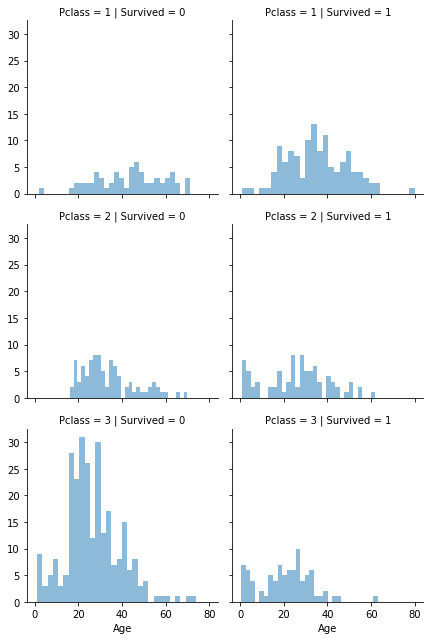

In [14]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.5, bins=30)
grid.add_legend()

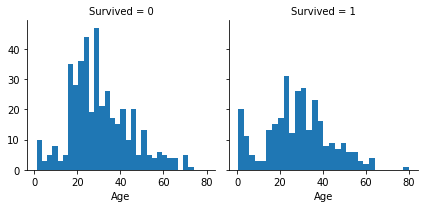

In [15]:
grid = sns.FacetGrid(train, col='Survived')
grid.map(plt.hist, 'Age', bins=30)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



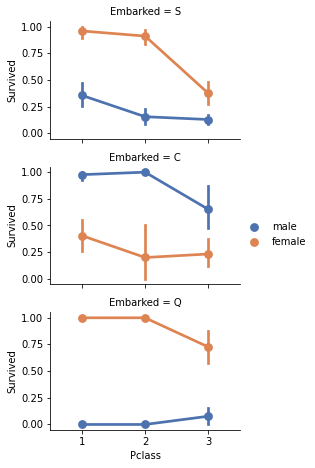

In [16]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [17]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [18]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.')

combine = [train, test]

In [19]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
for df in combine:
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 
                                       'Jonkheer', 'Lady', 'Major', 'Sir', 'Dr', 'Rev'], 'Rare')
    
    df['Title'] = df['Title'].replace('Mile', 'Miss')
    
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
train.pivot_table(index='Title',
                 values='Survived',
                 aggfunc='mean')

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [21]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4,'Rare':5}

for df in combine:
    df['Title'] = df['Title'].map(title_mapping)
    df['Title'] = df['Title'].fillna(0)
    df['Title'] = df['Title'].astype(int)
    
display(train.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,3


In [22]:
for df in combine:
    df['Sex'] = df['Sex'].map({'male':1, 'female':0}).astype(int)


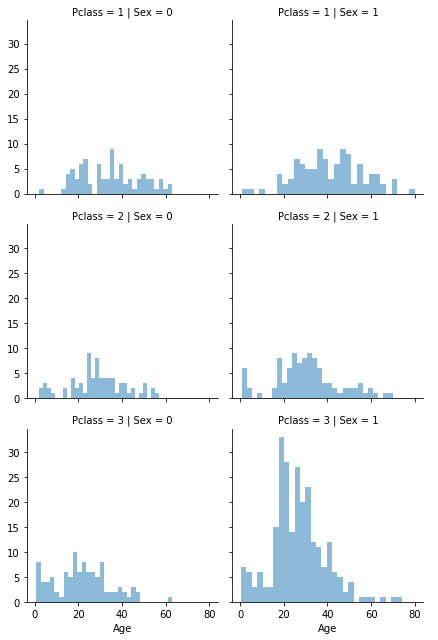

In [23]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex')
grid.map(plt.hist, 'Age', alpha=.5, bins=30)
grid.add_legend()

Необходимо дополнить отсутствующие значения возраста. Отсутсвующие значения можно заполнить средними значениями для групп, составленных по двум признакам: полу и классу билета (2 пола и 3 класса -всего 6 групп).

In [24]:
guess_ages = np.zeros((2,3))
for df in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = df[(df['Sex'] == i) & \
            (df['Pclass'] == j+1)]['Age'].dropna()
            
            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    df['Age'] = df['Age'].astype(int)
            

Берем теперь 5 групп возрастов и смотрим корреляцию с выживаемостью

In [25]:
train['age_bands'] = pd.cut(train['Age'], 5)

train.pivot_table(index='age_bands',
                values='Survived',
                 aggfunc='mean').reset_index()


,age_bands,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [26]:
for df in combine:
    df.loc[df['Age'] <= 16, 'Age' ] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[ df['Age'] > 64, 'Age']

In [27]:
train = train.drop(['age_bands'], axis=1)

Создадим новые фичи из имеющихся. Например, можно сделать размер семьи из parch и SibSp. Или перемножить возрастные группы и класс пассажирского билета.

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Title        891 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 76.7+ KB


In [29]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
    
train.pivot_table(index='FamilySize',
                values='Survived',
                aggfunc='mean').reset_index()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
 9   Title        418 non-null    int64  
 10  FamilySize   418 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 36.0+ KB


In [31]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test['IsAlone'] = 0
test.loc[test['FamilySize'] == 1, 'IsAlone'] = 1
    
train.pivot_table(index='IsAlone',
                 values='Survived',
                 aggfunc='mean').reset_index()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [32]:
test['Age*Class'] = test['Age'] * test['Pclass']
train['Age*Class'] = train['Age'] * train['Pclass']
    


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Title        891 non-null    int64  
 11  FamilySize   891 non-null    int64  
 12  IsAlone      891 non-null    int64  
 13  Age*Class    891 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 97.6+ KB


В датасете отсуствуют две строчки поля embarked - это по сути порты, где садились пассажиры..

In [34]:
freq_port = train['Embarked'].dropna().mode()[0]
train['Embarked'] = train['Embarked'].fillna(freq_port)
test['Embarked'] = test['Embarked'].fillna(freq_port)

In [35]:
train.pivot_table(index='Embarked',
                 values='Survived',
                 aggfunc='mean')\
                                .reset_index()\
                                .sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [36]:
embarked_dict = {'S':0, 'Q':1, 'C':2}
train['Embarked'] = train['Embarked'].map(embarked_dict).astype(int)
test['Embarked'] = test['Embarked'].map(embarked_dict).astype(int)
    
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,7.2500,0,1,2,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,71.2833,2,3,2,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,7.9250,0,2,1,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,53.1000,0,3,2,0,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,8.0500,0,1,1,1,6


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    int64  
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    int64  
 9   Title        418 non-null    int64  
 10  FamilySize   418 non-null    int64  
 11  IsAlone      418 non-null    int64  
 12  Age*Class    418 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 42.6+ KB


В тестовом датафрейме отсутствует одно значение цены за билет. Пусть оно будет медианным. Также округлим цену билета до сотых.

In [38]:
test['Fare'] = test['Fare'].fillna(test['Fare'].dropna().median())
test = test.drop(columns='Name')
train = train.drop(columns='Name')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
 9   Title        891 non-null    int64  
 10  FamilySize   891 non-null    int64  
 11  IsAlone      891 non-null    int64  
 12  Age*Class    891 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 90.6 KB


In [39]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [40]:

train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,1,0,3,1,1,1,0,0,0,1,2,0,3
1,2,1,1,0,2,1,0,3,2,3,2,0,2
2,3,1,3,0,1,0,0,1,0,2,1,1,3
3,4,1,1,0,2,1,0,3,0,3,2,0,2
4,5,0,3,1,2,0,0,1,0,1,1,1,6
5,6,0,3,1,1,0,0,1,1,1,1,1,3
6,7,0,1,1,3,0,0,3,0,1,1,1,3
7,8,0,3,1,0,3,1,2,0,4,5,0,0
8,9,1,3,0,1,0,2,1,0,3,3,0,3
9,10,1,2,0,0,1,0,2,2,3,2,0,0


In [41]:
X_train = train.drop('Survived', axis=1)
Y_train = train['Survived']
X_test = test

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Pclass       891 non-null    int64
 2   Sex          891 non-null    int64
 3   Age          891 non-null    int64
 4   SibSp        891 non-null    int64
 5   Parch        891 non-null    int64
 6   Fare         891 non-null    int64
 7   Embarked     891 non-null    int64
 8   Title        891 non-null    int64
 9   FamilySize   891 non-null    int64
 10  IsAlone      891 non-null    int64
 11  Age*Class    891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


In [42]:
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.15

In [43]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.46

In [44]:
random_forest = RandomForestClassifier(n_estimators=80)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [45]:
samp_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
X = test
#samp_sub['Survived'] = random_forest.predict(X)
#samp_sub['Survived'] = logreg.predict(X)
samp_sub['Survived'] = knn.predict(X)

In [47]:
#мультимодель

rf = random_forest.predict(X)
lr = logreg.predict(X)
kn = knn.predict(X)

threesome = (rf + lr + kn)/3

threesome = threesome.round(0).astype('int')

samp_sub['Survived'] = threesome

In [48]:
samp_sub.to_csv('gender_submission.csv', index=False)